In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
# prompt: upload dataset

# Install necessary libraries if not already installed
!pip install mysql-connector-python flask scikit-learn pandas numpy

# Upload the dataset (assuming it's a CSV file named 'your_dataset.csv')
# Replace 'your_dataset.csv' with the actual filename
from google.colab import files
uploaded = files.upload()

# Now you can use pandas to read the uploaded CSV file
import pandas as pd
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)

  # Example usage
  print(df.head())


KeyboardInterrupt: 

In [ ]:
# prompt: print the head and describe the dataset

print(df.describe())


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Bank_Transaction_Fraud_Detection.csv to Bank_Transaction_Fraud_Detection.csv


In [ ]:
# prompt: describe the uploaded dataset and create df for the dataset first

import pandas as pd
# Assuming the uploaded file is still named 'your_dataset.csv'
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)

  # Describe the dataset
  print(df.describe(include='all')) # Include all columns, including non-numeric
  print(df.info()) # Provides data types and non-null counts

  # Example usage: Display the first few rows of the DataFrame
  print(df.head())


User uploaded file "Bank_Transaction_Fraud_Detection.csv" with length 68295288 bytes
                                 Customer_ID Customer_Name  Gender  \
count                                 200000        200000  200000   
unique                                200000        142699       2   
top     7e3df93d-30da-4790-b3b4-5757408c78cd   Aahana Kala    Male   
freq                                       1             8  100452   
mean                                     NaN           NaN     NaN   
std                                      NaN           NaN     NaN   
min                                      NaN           NaN     NaN   
25%                                      NaN           NaN     NaN   
50%                                      NaN           NaN     NaN   
75%                                      NaN           NaN     NaN   
max                                      NaN           NaN     NaN   

                  Age     State        City        Bank_Branch Account_Typ

In [ ]:
df=df.drop(["Customer_ID","Customer_Name","Transaction_ID","Customer_Contact","Customer_Email","Merchant_ID","Transaction_Currency"],axis=1)

In [ ]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [ ]:
df.info

<bound method DataFrame.info of         Gender  Age                                     State  \
0         Male   60                                    Kerala   
1       Female   51                               Maharashtra   
2         Male   20                                     Bihar   
3       Female   57                                Tamil Nadu   
4       Female   43                                    Punjab   
...        ...  ...                                       ...   
199995  Female   55  Dadra and Nagar Haveli and Daman and Diu   
199996    Male   51                                   Manipur   
199997  Female   41                                Chandigarh   
199998  Female   28                                 Telangana   
199999    Male   34                                  Nagaland   

                      City                Bank_Branch Account_Type  \
0       Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1                   Nashik              Nashik Branch     Business   
2                Bhagalpur           Bhagalpur Branch      Savings   
3                  Chennai             Chennai Branch     Business   
4                 Amritsar            Amritsar Branch      Savings   
...                    ...                        ...          ...   
199995                 Diu                 Diu Branch     Business   
199996           Kangpokpi           Kangpokpi Branch     Business   
199997          Chandigarh          Chandigarh Branch      Savings   
199998           Nizamabad           Nizamabad Branch     Checking   
199999              Kohima              Kohima Branch     Business   

       Transaction_Date Transaction_Time  Transaction_Amount Transaction_Type  \
0            23-01-2025         16:04:07            32415.45         Transfer   
1            11-01-2025         17:14:53            43622.60     Bill Payment   
2            25-01-2025         03:09:52            63062.56     Bill Payment   
3            19-01-2025         12:27:02            14000.72            Debit   
4            30-01-2025         18:30:46            18335.16         Transfer   
...                 ...              ...                 ...              ...   
199995       08-01-2025         18:42:09            98513.74           Credit   
199996       01-01-2025         20:51:21            40593.55       Withdrawal   
199997       28-01-2025         10:47:40            61579.70       Withdrawal   
199998       08-01-2025         06:26:41            39488.22            Debit   
199999       08-01-2025         15:26:19            58622.49            Debit   

       Merchant_Category  Account_Balance Transaction_Device  \
0             Restaurant         74557.27    Voice Assistant   
1             Restaurant         74622.66  POS Mobile Device   
2              Groceries         66817.99                ATM   
3          Entertainment         58177.08     POS Mobile App   
4          Entertainment         16108.56       Virtual Card   
...                  ...              ...                ...   
199995        Restaurant         37475.11     Desktop/Laptop   
199996         Groceries         53037.20                ATM   
199997            Health         96225.36                ATM   
199998       Electronics         89599.90    Voice Assistant   
199999       Electronics         15066.24       Virtual Card   

                                 Transaction_Location Device_Type  Is_Fraud  \
0                          Thiruvananthapuram, Kerala         POS         0   
1                                 Nashik, Maharashtra     Desktop         0   
2                                    Bhagalpur, Bihar     Desktop         0   
3                                 Chennai, Tamil Nadu      Mobile         0   
4                                    Amritsar, Punjab      Mobile         0   
...                                               ...         ...       ...   
199995  Diu, Dadra and Nagar Haveli and Daman and D

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
State,0
City,0
Bank_Branch,0
Account_Type,0
Transaction_Date,0
Transaction_Time,0
Transaction_Amount,0
Transaction_Type,0


In [ ]:
df.duplicated().sum()

0

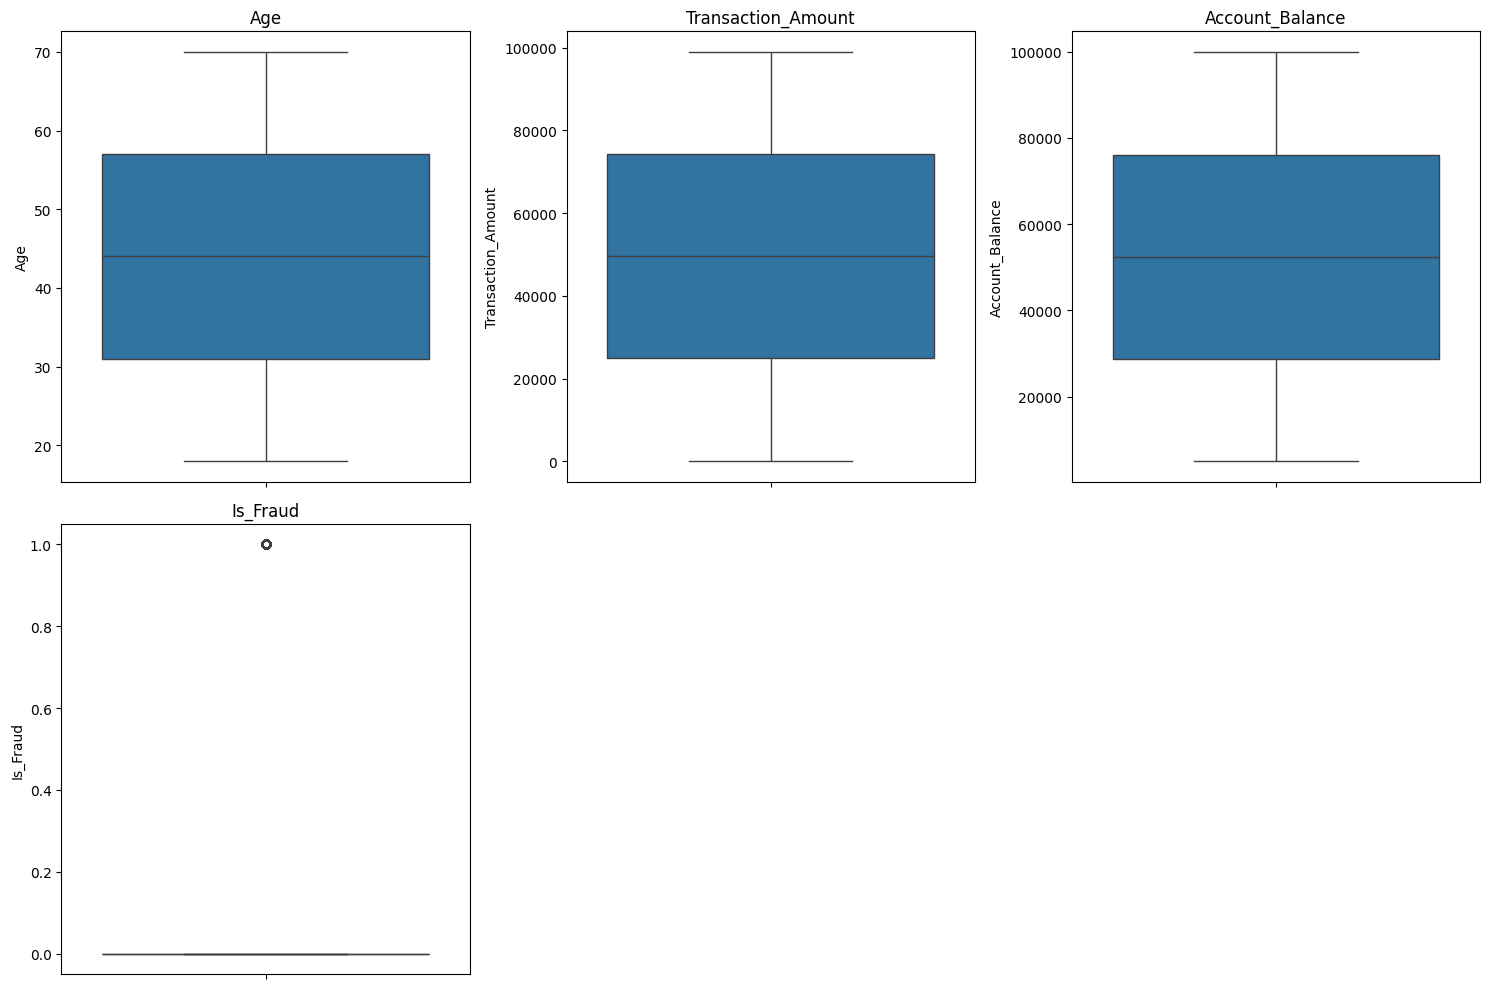

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# df = pd.read_csv('your_dataset.csv') # If you need to load the csv

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols.columns)
num_rows = (num_cols + 2) // 3  # Adjust for a good layout, max 3 columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=min(3, num_cols), figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Generate boxplots in subplots
for i, column in enumerate(numerical_cols.columns):
    sns.boxplot(y=numerical_cols[column], ax=axes[i]) # changed from df=numerical_cols
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

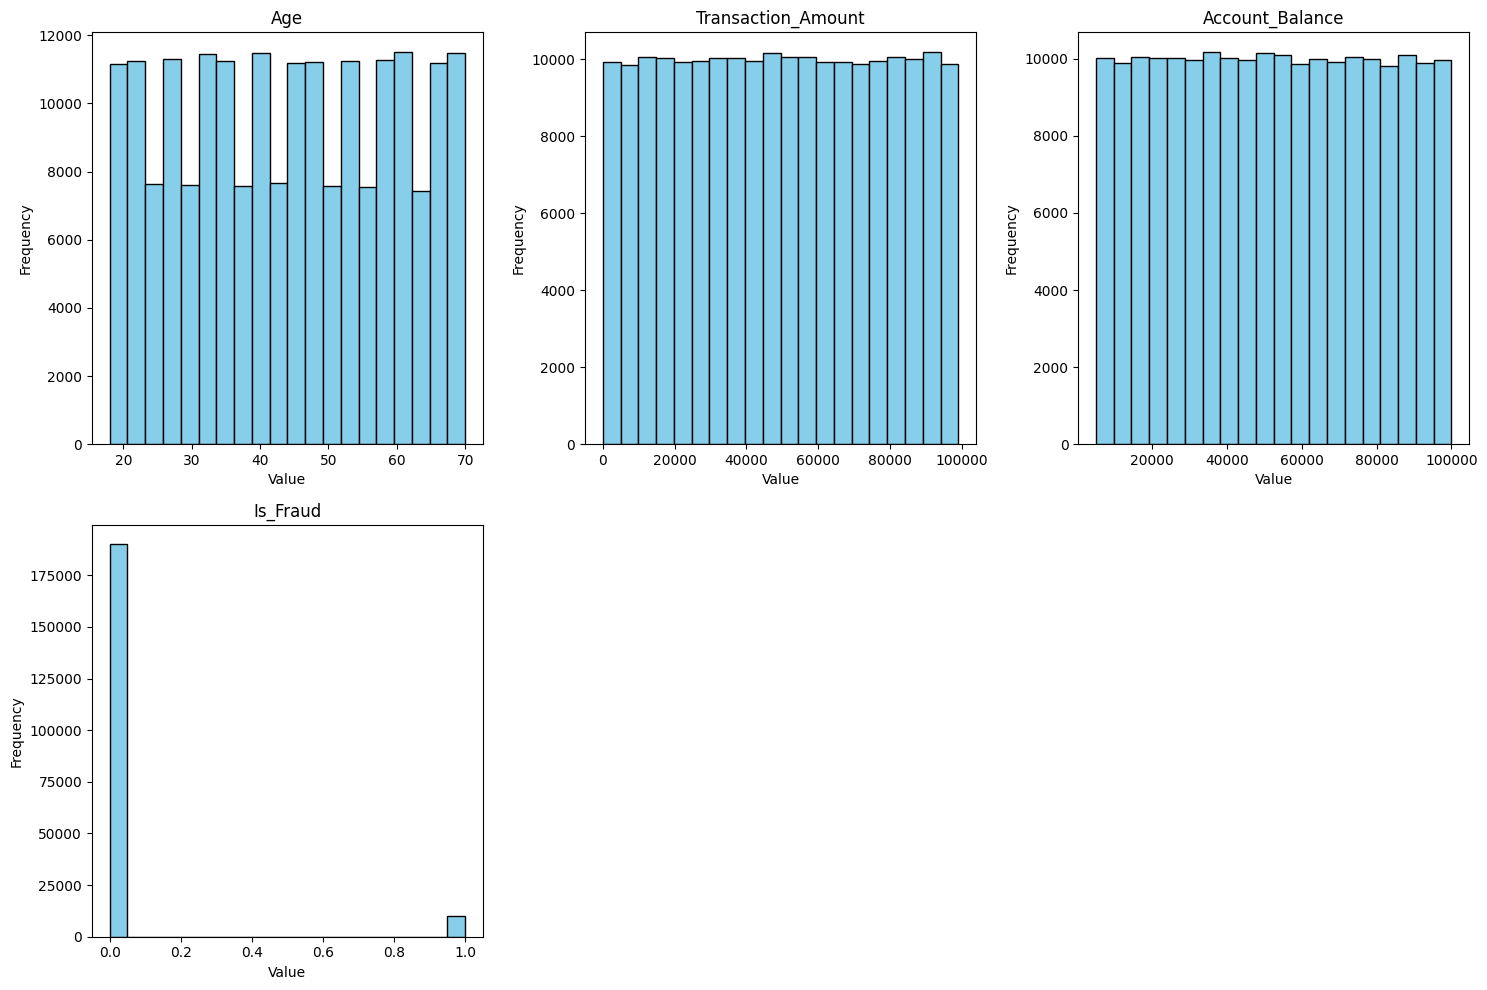

In [ ]:
numerical_cols = df.select_dtypes(include=['number'])

num_cols = len(numerical_cols.columns)
fig, axes = plt.subplots(nrows=num_cols // 3 + 1, ncols=3, figsize=(15, num_cols * 2.5))
axes = axes.flatten()
for i, col in enumerate(numerical_cols.columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head(5)

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
0,1,60,15,127,127,2,22,52151,32415.45,3,5,74557.27,17,129,3,0,9
1,0,51,18,100,100,0,10,55958,43622.60,0,5,74622.66,9,102,1,0,65
2,1,20,4,13,13,2,24,10257,63062.56,0,3,66817.99,0,13,1,0,102
3,0,57,28,22,22,0,18,40370,14000.72,2,2,58177.08,8,24,2,0,51
4,0,43,25,7,7,2,29,60052,18335.16,3,2,16108.56,16,7,2,0,37


<Axes: >

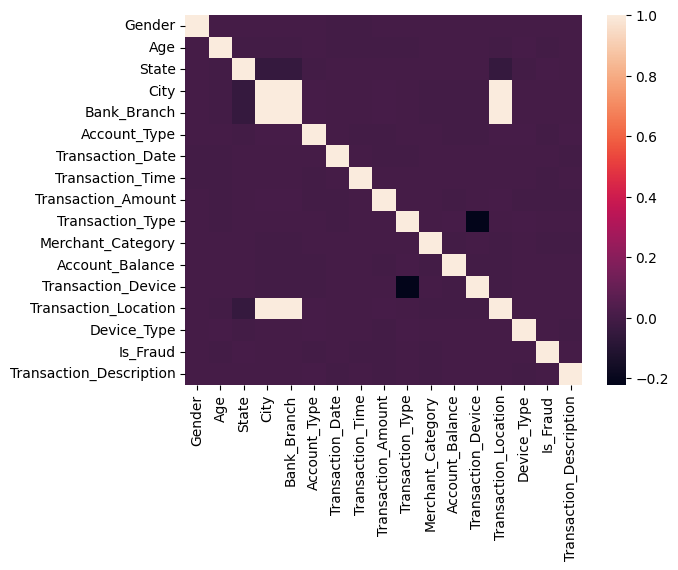

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
Gender,1.000000,0.001692,0.002899,-0.000299,-0.000299,0.001260,-0.003731,-0.001941,0.001468,0.001339,0.002233,-0.000392,0.002109,-0.000261,-0.000534,0.000649,-0.000869
Age,0.001692,1.000000,-0.004638,-0.002284,-0.002284,-0.000281,-0.001401,-0.001294,-0.003087,-0.001291,-0.000381,0.000269,0.002429,-0.002291,0.004997,-0.001517,-0.000346
State,0.002899,-0.004638,1.000000,-0.046278,-0.046278,-0.002314,0.002415,0.000640,0.002480,-0.000130,0.001078,0.000136,0.001103,-0.044936,-0.001835,0.005716,0.001027
City,-0.000299,-0.002284,-0.046278,1.000000,1.000000,0.007245,0.002291,0.000812,0.005674,0.000101,-0.001047,-0.002628,-0.001441,0.999910,-0.000052,0.002800,0.001547
Bank_Branch,-0.000299,-0.002284,-0.046278,1.000000,1.000000,0.007245,0.002291,0.000812,0.005674,0.000101,-0.001047,-0.002628,-0.001441,0.999910,-0.000052,0.002800,0.001547
Account_Type,0.001260,-0.000281,-0.002314,0.007245,0.007245,1.000000,0.002025,-0.001731,-0.004737,0.001876,0.000169,-0.001506,-0.003000,0.007216,0.004613,-0.002592,0.005007
Transaction_Date,-0.003731,-0.001401,0.002415,0.002291,0.002291,0.002025,1.000000,0.000642,-0.001282,-0.001170,0.002922,0.001641,0.002933,0.002271,-0.000271,-0.000135,-0.003088
Transaction_Time,-0.001941,-0.001294,0.000640,0.000812,0.000812,-0.001731,0.000642,1.000000,0.001743,-0.000269,0.000318,0.002224,0.002040,0.000809,-0.000822,-0.001909,-0.000427
Transaction_Amount,0.001468,-0.003087,0.002480,0.005674,0.005674,-0.004737,-0.001282,0.001743,1.000000,0.001788,-0.000628,-0.001735,-0.000665,0.005656,-0.001315,-0.002100,-0.003523
Transaction_Type,0.001339,-0.001291,-0.000130,0.000101,0.000101,0.001876,-0.001170,-0.000269,0.001788,1.000000,0.002913,0.003874,-0.220293,0.000075,0.005041,0.000630,0.000065


In [ ]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Gradiant Boosting Classifier":GradientBoostingClassifier(),
    "Naive Bayes Classifier":GaussianNB()
}

In [ ]:
x=df.drop(["Is_Fraud"],axis=1)
y=df["Is_Fraud"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [ ]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print("-" * 30)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Random Forest Classifier
Accuracy: 94.88600000000001
------------------------------
Model: Decision Tree Classifier
Accuracy: 88.722
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Ada Boost Classifier
Accuracy: 94.88600000000001
------------------------------
Model: Logistic Regression
Accuracy: 94.88600000000001
------------------------------
Model: Gradiant Boosting Classifier
Accuracy: 94.884
------------------------------
Model: Naive Bayes Classifier
Accuracy: 94.88600000000001
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


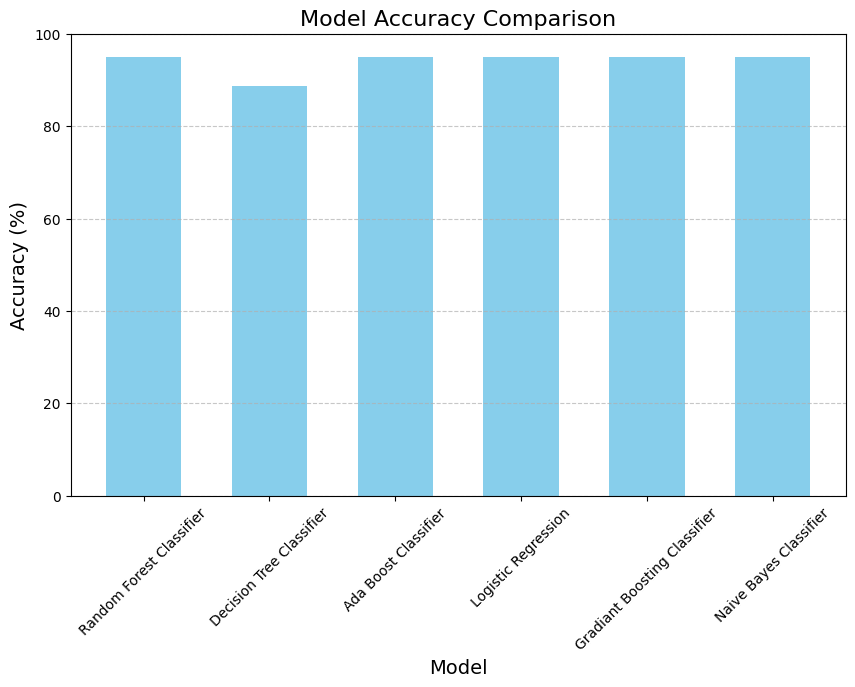

In [ ]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue', width=0.6)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

the above file iss EDA

🔍 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   200000 non-null  int64  
 1   Age                      200000 non-null  int64  
 2   State                    200000 non-null  int64  
 3   City                     200000 non-null  int64  
 4   Bank_Branch              200000 non-null  int64  
 5   Account_Type             200000 non-null  int64  
 6   Transaction_Date         200000 non-null  int64  
 7   Transaction_Time         200000 non-null  int64  
 8   Transaction_Amount       200000 non-null  float64
 9   Transaction_Type         200000 non-null  int64  
 10  Merchant_Category        200000 non-null  int64  
 11  Account_Balance          200000 non-null  float64
 12  Transaction_Device       200000 non-null  int64  
 13  Transaction_Location     200000 non-nu

<ipython-input-21-d1f7d5b217b2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Is_Fraud"], palette="coolwarm")


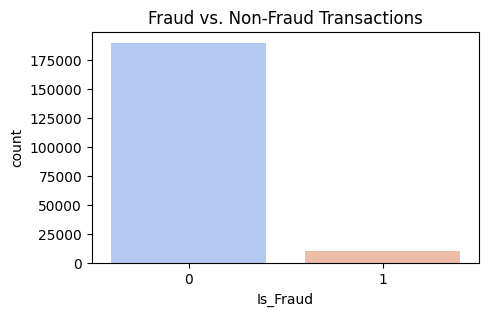

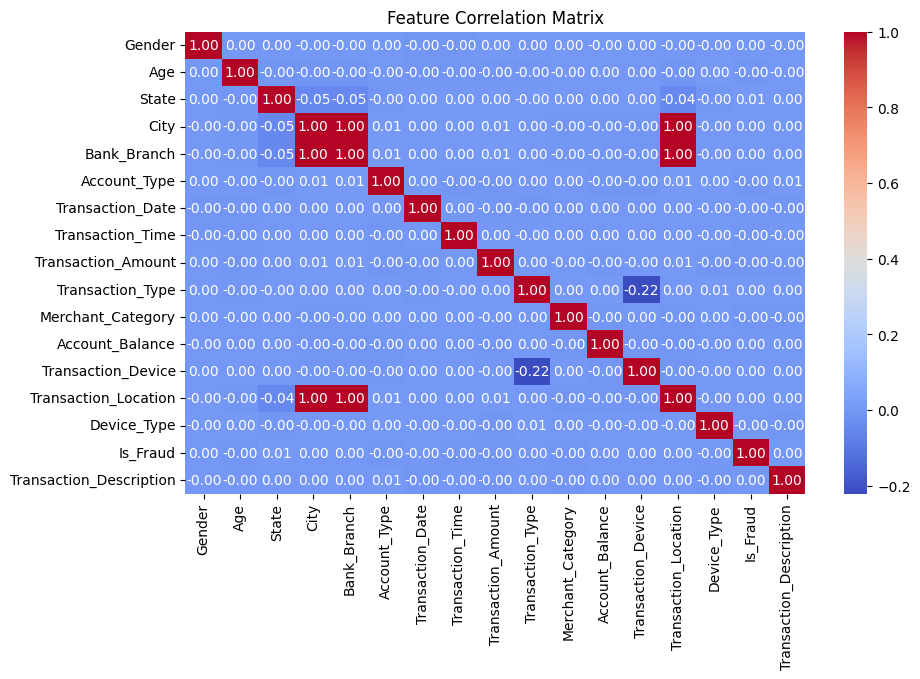

ValueError: num must be an integer with 1 <= num <= 6, not 7

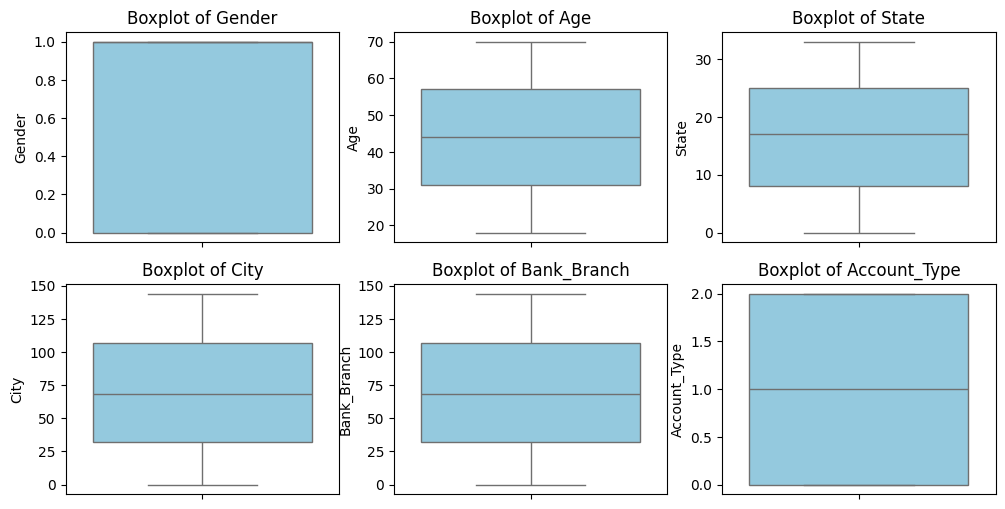

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
# 📊 1️⃣ EDA - Basic Info & Missing Values Check
print("🔍 Dataset Overview:\n")
print(df.info())  # Column info
print("\n📉 Missing Values:\n", df.isnull().sum())

# 📊 2️⃣ EDA - Summary Statistics
print("\n📊 Summary Statistics:\n", df.describe())

# 📊 3️⃣ EDA - Class Distribution (Fraud vs. Non-Fraud)
plt.figure(figsize=(5, 3))
sns.countplot(x=df["Is_Fraud"], palette="coolwarm")
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()

# 📊 4️⃣ EDA - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# 📊 5️⃣ EDA - Boxplots (Outlier Detection)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1) # fixed: indexing subplots based on number of numerical cols
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 📊 6️⃣ EDA - Pairplot (Feature Relationships)
sns.pairplot(df, hue="Is_Fraud", diag_kind="kde", palette="coolwarm")
plt.show()

# 🔹 Drop unnecessary columns
df = df.drop(["Customer_ID", "Customer_Name", "Transaction_ID", "Customer_Contact",
              "Customer_Email", "Merchant_ID", "Transaction_Currency"], axis=1)

# 🔹 Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values

# 🔹 Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 🔹 Select Features and Target
X = df.drop("Is_Fraud", axis=1)
y = df["Is_Fraud"]

# 🔹 Train-Test Split (Stratified for balanced class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# 🔹 Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Models with Hyperparameter Tuning
model_params = {
    "Random Forest Classifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "Decision Tree Classifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "Ada Boost Classifier": {
        "model": AdaBoostClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    },
    "Gradient Boosting Classifier": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1.0],
            "max_depth": [3, 5, 10]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Naive Bayes Classifier": {
        "model": GaussianNB(),
        "params": {}
    }
}

# 🔹 Model Evaluation with GridSearchCV
best_models = {}
metrics = {
    'Model': [],
    'Best Parameters': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model_info in model_params.items():
    print(f"Training {name} with GridSearchCV...")

    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=skf, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best Model
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Predictions
    y_pred = best_model.predict(X_test)

    # Metrics Calculation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store Results
    metrics['Model'].append(name)
    metrics['Best Parameters'].append(grid_search.best_params_)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(prec * 100)
    metrics['Recall'].append(rec * 100)
    metrics['F1 Score'].append(f1 * 100)
    metrics['ROC AUC'].append(roc_auc * 100)

    print(f"✅ {name} Best Params: {grid_search.best_params_}")
    print(f"✅ Accuracy: {acc * 100:.2f}% | Precision: {prec * 100:.2f}% | Recall: {rec * 100:.2f}% | F1 Score: {f1 * 100:.2f}% | ROC AUC: {roc_auc * 100:.2f}%")
    print("-" * 50)

# 🔹 Convert Metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# 🔹 Display Model Performance
print("\n🎯 Best Model Performance Summary:\n")
print(metrics_df)

# 🔹 Save Best Model & Scaler
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models["Random Forest Classifier"], f)  # Change model if needed

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\n✅ Best Model & Scaler saved successfully!")